<a href="https://colab.research.google.com/github/amf599-cyber/N-Body_Test/blob/main/Test-Data-Analysis-v1-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/particle_accelerations.csv')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Display the names of all columns in the DataFrame
print('\nColumn names:')
print(df.columns)

First 5 rows of the DataFrame:
    delta_x   delta_y   delta_z      acc_x     acc_y     acc_z      pot_x  \
0  0.480802  0.914920  0.467958   -113.371  53115.20  -2524.95    1560.13   
1  0.384588  0.293847  0.840969  -5819.030 -15335.50  31268.90  133370.00   
2  0.878550  0.611567  0.403323  39571.700   3849.64   2597.22 -735949.00   
3  0.631973  0.348527  0.817951   8277.370  -7615.86  31157.50 -211254.00   
4  0.004905  0.357012  0.001457 -30025.800  -3722.04 -32273.60  138014.00   

      pot_y     pot_z  
0 -730932.0   34746.4  
1  351484.0 -716673.0  
2  -71595.1  -48302.7  
3  194371.0 -795199.0  
4   17108.4  148346.0  

Column names:
Index(['delta_x', 'delta_y', 'delta_z', 'acc_x', 'acc_y', 'acc_z', 'pot_x',
       'pot_y', 'pot_z'],
      dtype='object')


In [2]:
import numpy as np

# Calculate radius magnitude
df['radius_magnitude'] = np.sqrt(df['delta_x']**2 + df['delta_y']**2 + df['delta_z']**2)

# Calculate acceleration magnitude
df['acceleration_magnitude'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)

# Calculate potential magnitude
df['potential_magnitude'] = np.sqrt(df['pot_x']**2 + df['pot_y']**2 + df['pot_z']**2)

# Display the first few rows with the new magnitude columns
print("DataFrame with new magnitude columns:")
print(df.head())

DataFrame with new magnitude columns:
    delta_x   delta_y   delta_z      acc_x     acc_y     acc_z      pot_x  \
0  0.480802  0.914920  0.467958   -113.371  53115.20  -2524.95    1560.13   
1  0.384588  0.293847  0.840969  -5819.030 -15335.50  31268.90  133370.00   
2  0.878550  0.611567  0.403323  39571.700   3849.64   2597.22 -735949.00   
3  0.631973  0.348527  0.817951   8277.370  -7615.86  31157.50 -211254.00   
4  0.004905  0.357012  0.001457 -30025.800  -3722.04 -32273.60  138014.00   

      pot_y     pot_z  radius_magnitude  acceleration_magnitude  \
0 -730932.0   34746.4          1.134563            53175.301565   
1  351484.0 -716673.0          0.970300            35309.811350   
2  -71595.1  -48302.7          1.143912            39843.251885   
3  194371.0 -795199.0          1.090828            33125.609185   
4   17108.4  148346.0          0.357049            44237.851489   

   potential_magnitude  
0        731759.068917  
1        809289.038654  
2        740999.28459

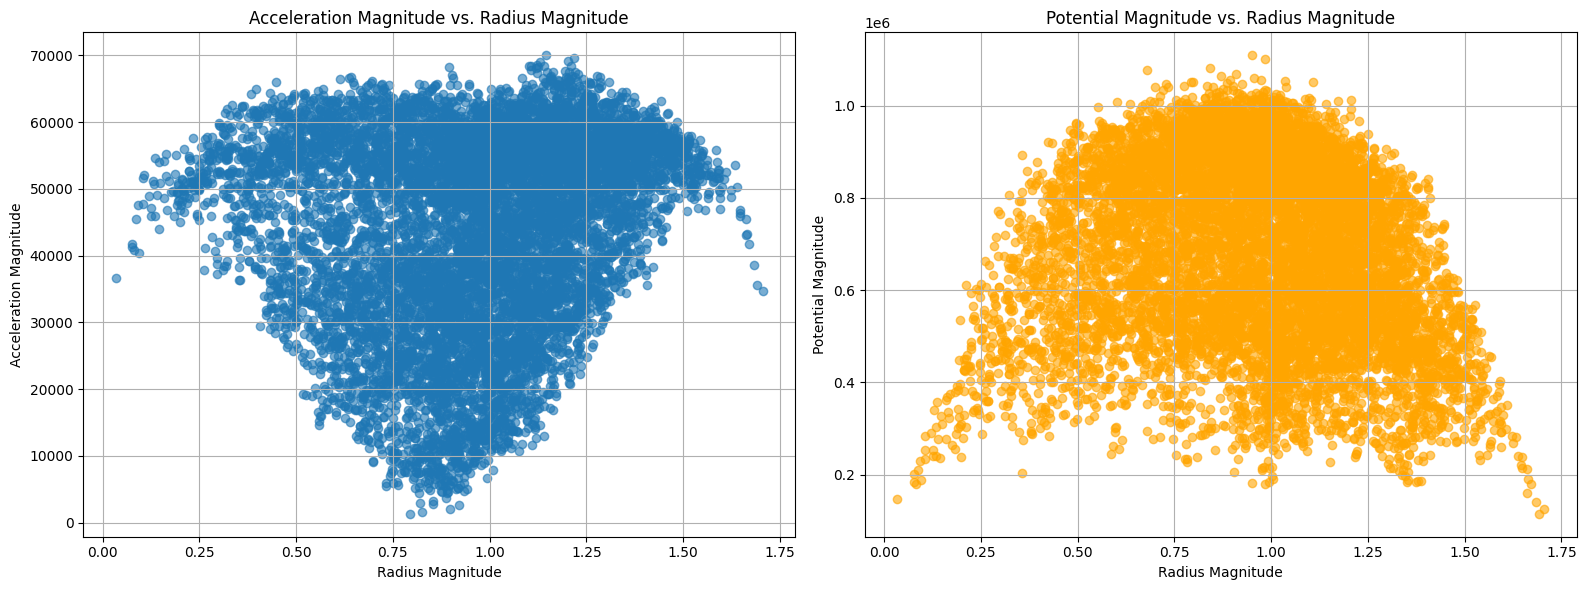

In [3]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Acceleration Magnitude vs. Radius Magnitude
axes[0].scatter(df['radius_magnitude'], df['acceleration_magnitude'], alpha=0.6)
axes[0].set_title('Acceleration Magnitude vs. Radius Magnitude')
axes[0].set_xlabel('Radius Magnitude')
axes[0].set_ylabel('Acceleration Magnitude')
axes[0].grid(True)

# Plot 2: Potential Magnitude vs. Radius Magnitude
axes[1].scatter(df['radius_magnitude'], df['potential_magnitude'], alpha=0.6, color='orange')
axes[1].set_title('Potential Magnitude vs. Radius Magnitude')
axes[1].set_xlabel('Radius Magnitude')
axes[1].set_ylabel('Potential Magnitude')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [4]:
particle_positions = df[['delta_x', 'delta_y', 'delta_z']]

print('First 5 rows of particle_positions:')
print(particle_positions.head())

First 5 rows of particle_positions:
    delta_x   delta_y   delta_z
0  0.480802  0.914920  0.467958
1  0.384588  0.293847  0.840969
2  0.878550  0.611567  0.403323
3  0.631973  0.348527  0.817951
4  0.004905  0.357012  0.001457


In [5]:
from scipy.spatial import distance
import numpy as np

# Get the number of particles
num_particles = len(particle_positions)
print(f"Total number of particles: {num_particles}")

# Initialize an empty list to store the calculated distances
separation_distances = []

# Loop through all unique pairs of particles
# We use a nested loop, ensuring i < j to get unique pairs and avoid calculating distance of a particle with itself
for i in range(num_particles):
    for j in range(i + 1, num_particles):
        # Extract the 3D coordinates for particle i and particle j
        pos_i = particle_positions.iloc[i].values
        pos_j = particle_positions.iloc[j].values

        # Calculate the Euclidean distance between the two particles' coordinates
        dist = distance.euclidean(pos_i, pos_j)

        # Append the calculated distance to the separation_distances list
        separation_distances.append(dist)

# Convert the separation_distances list into a NumPy array
separation_distances = np.array(separation_distances)

# Display the first few distances and the total number of distances calculated
print(f"\nFirst 10 calculated separation distances:\n{separation_distances[:10]}")
print(f"\nTotal number of separation distances calculated: {len(separation_distances)}")

Total number of particles: 10000


KeyboardInterrupt: 